## 📘 Análisis Estadístico Descriptivo de Autos Usados en India

### 📌 Contexto

El dataset utilizado proviene del portal **CarDekho**, una plataforma india de venta de autos nuevos y usados. Contiene información de miles de autos listados en India con variables como:

* Marca del auto
* Año de fabricación
* Precio de venta
* Tipo de combustible
* Número de propietarios
* Transmisión
* Kilometraje recorrido

El objetivo de esta notebook es aplicar técnicas de estadística descriptiva y visualización de datos para entender mejor la distribución de precios, el estado general de los autos y sus características clave.

### 🔧 1. Carga de librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
plt.style.use('ggplot')
sns.set(font_scale=1.1)

# Cargar el dataset
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Mostrar las primeras filas
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### 🔍 2. Exploración inicial del dataset

In [2]:
# Dimensiones
print("Filas y columnas:", df.shape)

# Nombres de columnas
print("Columnas:", df.columns)

# Tipos de datos
df.info()

# Estadísticas básicas
df.describe()


Filas y columnas: (4340, 8)
Columnas: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### 📊 3. Medidas de tendencia central

Vamos a calcular la media, mediana y moda del precio de venta (selling_price) y los kilómetros recorridos (km_driven).

In [3]:
# Precio de venta
print("Media precio:", df['selling_price'].mean())
print("Mediana precio:", df['selling_price'].median())
print("Moda precio:", df['selling_price'].mode()[0])

# Kilometraje
print("Media km:", df['km_driven'].mean())
print("Mediana km:", df['km_driven'].median())
print("Moda km:", df['km_driven'].mode()[0])


Media precio: 504127.3117511521
Mediana precio: 350000.0
Moda precio: 300000
Media km: 66215.77741935484
Mediana km: 60000.0
Moda km: 70000


### 📈 4. Medidas de dispersión
Calculamos el rango, la varianza y la desviación estándar.

In [4]:
# Rango
print("Rango precio:", df['selling_price'].max() - df['selling_price'].min())

# Varianza y desviación estándar
print("Varianza precio:", df['selling_price'].var())
print("Desviación estándar precio:", df['selling_price'].std())

print("Varianza km:", df['km_driven'].var())
print("Desviación estándar km:", df['km_driven'].std())


Rango precio: 8880000
Varianza precio: 334718640087.90295
Desviación estándar precio: 578548.7361388865
Varianza km: 2175672269.448949
Desviación estándar km: 46644.102193620885


### 📉 5. Visualización de variables numéricas

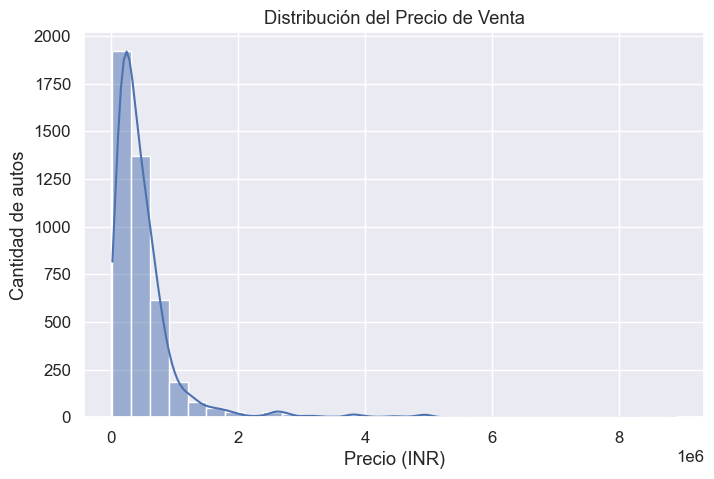

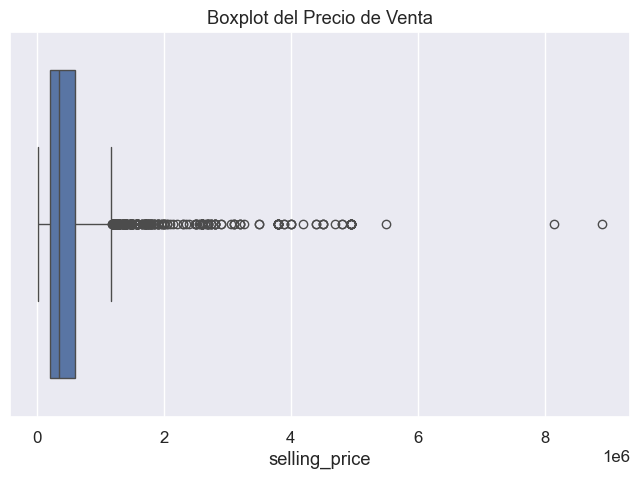

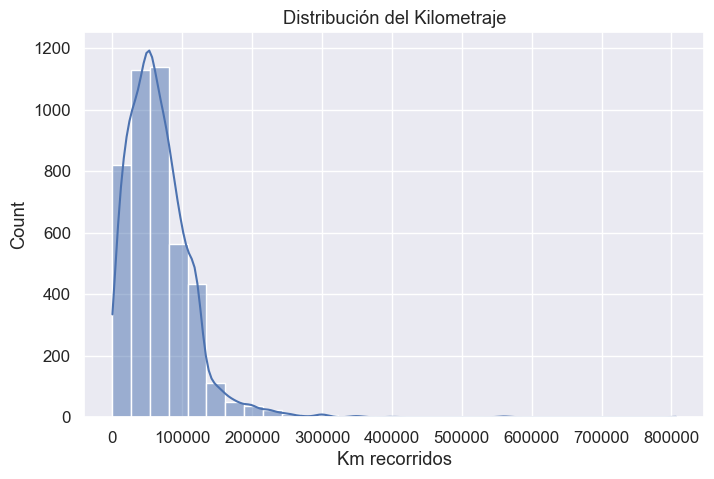

In [5]:
# Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio (INR)')
plt.ylabel('Cantidad de autos')
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot del Precio de Venta')
plt.show()

# Histograma del kilometraje
plt.figure(figsize=(8,5))
sns.histplot(df['km_driven'], bins=30, kde=True)
plt.title('Distribución del Kilometraje')
plt.xlabel('Km recorridos')
plt.show()


### 🔗 6. Relación entre variables

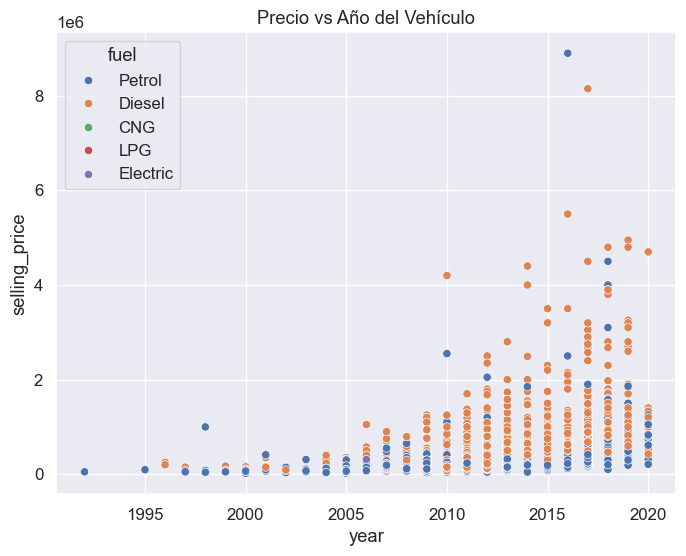

,selling_price,year,km_driven
selling_price,1.000000,0.413922,-0.192289
year,0.413922,1.000000,-0.419688
km_driven,-0.192289,-0.419688,1.000000


In [6]:
# Precio vs Año
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel')
plt.title('Precio vs Año del Vehículo')
plt.show()

# Correlación numérica
df[['selling_price', 'year', 'km_driven']].corr()


## ✅ Actividades Prácticas

1. ¿Cuál es el promedio de autos listados por año? Graficá la cantidad de autos por año.
2. Calculá la media, mediana y moda del `year` (año del vehículo).
3. Realizá un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.
4. Calculá el rango, varianza y desviación estándar del `year`.
5. Hacé un histograma del `selling_price` para autos que usan combustible "Diesel".
6. Graficá la distribución de autos por tipo de transmisión (`manual` vs `automatic`).
7. ¿Cuál es la relación entre el tipo de combustible (`fuel`) y el precio promedio de venta?
8. Usando un `groupby`, obtené el precio medio por año de fabricación.
9. Mostrá en un gráfico de barras cuántos autos pertenecen a cada número de dueños (`owner`).
10. Calculá las medidas de dispersión para el precio de autos automáticos únicamente.